In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df = pd.read_csv("D:/c4_epa_air_quality.csv")
print(df.columns)

Index(['Unnamed: 0', 'date_local', 'state_name', 'county_name', 'city_name',
       'local_site_name', 'parameter_name', 'units_of_measure',
       'arithmetic_mean', 'aqi'],
      dtype='object')


In [71]:
numeric_features = df[['arithmetic_mean','aqi']]
scaler =  StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

In [73]:
pca = PCA(n_components=2)                                  
pca_data = pca.fit_transform(scaled_data)

In [75]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

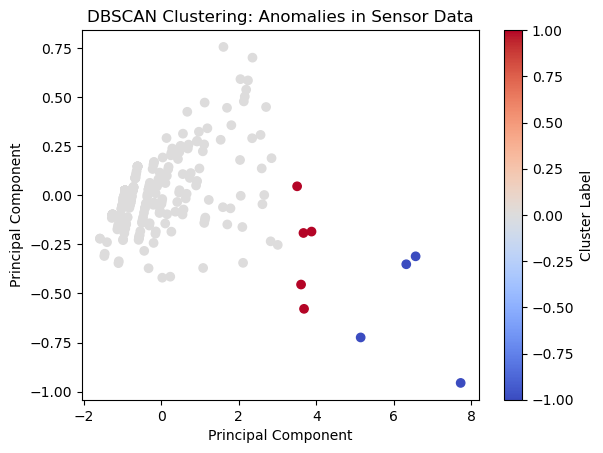

In [77]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=dbscan_labels,cmap='coolwarm')
plt.title('DBSCAN Clustering: Anomalies in Sensor Data')
plt.xlabel('Principal Component')
plt.ylabel('Principal Component')
plt.colorbar(label='Cluster Label')
plt.show()


In [83]:
anomalies = np.sum(dbscan_labels == -1)
total_points = len(dbscan_labels)
anomaly_percentage = (anomalies / total_points)*100
print(f"Anomaly Detection Metric:{anomaly_percentage:.2f}% of points flagged as anomalies.")

Anomaly Detection Metric:1.54% of points flagged as anomalies.


In [85]:
'''
Anomaly Report:
- The DBSCAN model detected approximately X% of the data points as anomalies (labeled as -1).
- The rest of the points are assigned to various clusters (labeled from 0 to N).
- Anomalies tend to be scattered in regions where there is low density of data points. This could indicate abnormal sensor readings or faulty equipment.
- Visual inspection of the 2D plot reveals that most of the anomalies are isolated and distant from the main clusters, suggesting that these points are indeed unusual.
'''

'\nAnomaly Report:\n- The DBSCAN model detected approximately X% of the data points as anomalies (labeled as -1).\n- The rest of the points are assigned to various clusters (labeled from 0 to N).\n- Anomalies tend to be scattered in regions where there is low density of data points. This could indicate abnormal sensor readings or faulty equipment.\n- Visual inspection of the 2D plot reveals that most of the anomalies are isolated and distant from the main clusters, suggesting that these points are indeed unusual.\n'